<div class="markdown-google-sans">
  <h2>Q Learning Tutorial Jupyter Notebook</h2>
</div>

# Importing packages


In [1]:
# Array math
import numpy as np

# Iteration tracking
from tqdm import tqdm

# Type hinting
from typing import Tuple

# Creating a gif from the images
from PIL import Image

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Os traversal
import os

For rendering Greek letters in Latex for plotting

In [2]:
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams["text.latex.preamble"]  = r"\usepackage{cmbright}"
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Defining the ploting functions

## Array Index to Matplot Coords Converter

In [3]:
def array_index_to_matplot_coords(i: int, j: int, n_cols: int) -> Tuple[int, int]:
    """Converts an array index to a matplot coordinate"""
    x = j
    y = n_cols - i - 1
    return x, y

## Maze Plotter

In [7]:
def plot_matrix(
    M: np.array,
    goal_coords: list = [],
    hole_coords: list = [],
    start_coords: list = [],
    highlight_coords: list = [],
    img_width: int = 5,
    img_height: int = 5,
    title: str = None,
    filename: str = None,
    ) -> None:
    """
    Plots a matrix as an image.
    """
    height, width = M.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')

    for x in range(height):
        for y in range(width):
            # By default, the (0, 0) coordinate in matplotlib is the bottom left corner,
            # so we need to invert the y coordinate to plot the matrix correctly
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)

            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='lightgreen'))
            # If there is a tuple of (x, y) in the hole_coords list, we color the cell salmon
            elif (x, y) in hole_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='salmon'))
            # If there is a tuple of (x, y) in the start_coords list, we color the cell yellow
            elif (x, y) in start_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='yellow'))
            # If there is a tuple of (x, y) in the highlight_coords list, we color the cell lightblue
            elif (x, y) in highlight_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='lightblue'))

            ax.annotate(str(M[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')

    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)
    if filename is not None:
        plt.savefig(filename)
        plt.close(fig)
    else:
        plt.show()

In [11]:
def plot_state_visits(
        S: np.array,
        visit_dict: dict,
        img_width: int = 5,
        img_height: int = 5,
        ):
    """
    Plots the states and colors them by the number of visits.

    The more visits a state has, the darker the color.
    """
    # Get the number of rows and columns
    n_rows, n_cols = S.shape
    # Create a new matrix to hold the number of visits
    V = np.zeros((n_rows, n_cols))
    # Iterate through the visit dictionary and update the V matrix
    for s, visits in visit_dict.items():
        # Converting the state to an array index
        s_index = np.where(S == s)

        row, col = s_index[0][0], s_index[1][0]

        V[row, col] = visits

    fig = plt.figure(figsize=(img_width, img_height))
    ax = fig.add_subplot(111, aspect='equal')

    # Ploting the matrix
    sns.heatmap(V, cmap='Blues', cbar=False, annot=True, fmt='.0f', ax=ax)
    plt.show()

## Policy Plotter

In [13]:
# Defining the ploting function for the policy
def plot_policy(
        S: np.ndarray,
        policy: dict,
        goal_coords: tuple,
        wall_coords: list,
        start_coords: tuple,
        optimal_policy_path: list,
        title: str,
        img_width: int = 6,
        img_height: int = 6
        ):
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_height))
    ax = fig.add_subplot(111, aspect='equal')
    for x in range(height):
        for y in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)

            # If there is a tuple of (x, y) in the hole_coords list, we color the cell gray
            if (x, y) in wall_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))

            # If there is a tuple of (x, y) in the goal_coords list, we color the cell yellow
            elif (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='lightgreen'))

            else:
                try:
                    # If there is a tuple of (x, y) in the start_coords list, we color the cell green
                    if (x, y) in start_coords:
                        ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='yellow'))

                        # Adding the arrows to the plot
                        if 0 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, 0, 0.3, head_width = 0.05, head_length = 0.05)
                        if 1 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, 0, -0.3, head_width = 0.05, head_length = 0.05)
                        if 2 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                        if 3 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)

                    elif (x, y) in optimal_policy_path:
                        ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='lightblue'))

                        # Adding the arrows to the plot
                        if 0 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, 0, 0.3, head_width = 0.05, head_length = 0.05)
                        if 1 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, 0, -0.3, head_width = 0.05, head_length = 0.05)
                        if 2 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                        if 3 == policy[S[x, y]]:
                            plt.arrow(matplot_x, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)
                except Exception as e:
                    print(f"Error: {e}")
                    print(f"Current x and y: {x}, {y}")

    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)

    plt.show()

## Q Table Plotter

In [15]:
# Defining the ploting function for the policy
def plot_Q_Table(
        S: np.ndarray,
        Q: np.ndarray,
        goal_coords: tuple,
        wall_coords: list,
        start_coords: tuple,
        title: str,
        img_width: int = 10,
        img_height: int = 10,
        filename: str = None
        ):
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_height))
    ax = fig.add_subplot(111, aspect='equal')
    for x in range(height):
        for y in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)

            # If there is a tuple of (x, y) in the hole_coords list, we color the cell gray
            if (x, y) in wall_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))

            # If there is a tuple of (x, y) in the goal_coords list, we color the cell yellow
            elif (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='lightgreen'))

            else:
                try:
                    # If there is a tuple of (x, y) in the start_coords list, we color the cell green
                    if (x, y) in start_coords:
                        ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='yellow'))


                    plt.arrow(matplot_x, matplot_y, 0, 0.2, head_width = 0.05, head_length = 0.05)
                    ax.annotate(f"{Q[S[x, y]][0]:.2f}", xy=(matplot_x, matplot_y + 0.5), ha='center', va='top')

                    plt.arrow(matplot_x, matplot_y, 0, -0.2, head_width = 0.05, head_length = 0.05)
                    ax.annotate(f"{Q[S[x, y]][1]:.2f}", xy=(matplot_x, matplot_y - 0.5), ha='center', va='bottom')

                    plt.arrow(matplot_x, matplot_y, -0.2, 0, head_width = 0.05, head_length = 0.05)
                    ax.annotate(f"{Q[S[x, y]][2]:.2f}", xy=(matplot_x - 0.5, matplot_y), ha='left', va='center')

                    plt.arrow(matplot_x, matplot_y, 0.2, 0, head_width = 0.05, head_length = 0.05)
                    ax.annotate(f"{Q[S[x, y]][3]:.2f}", xy=(matplot_x + 0.5, matplot_y), ha='right', va='center')

                except Exception as e:
                    print(f"Error: {e}")
                    print(f"Current x and y: {x}, {y}")

    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)

    if filename is not None:
        plt.savefig(filename)
        plt.close(fig)
    else:
        plt.show()

In [19]:
# Defining the ploting function for the policy
def plot_V_Table(
        S: np.ndarray,
        Q: np.ndarray,
        goal_coords: tuple,
        wall_coords: list,
        start_coords: tuple,
        title: str,
        img_width: int = 6,
        img_height: int = 6,
        filename: str = None
        ):
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_height))
    ax = fig.add_subplot(111, aspect='equal')
    for x in range(height):
        for y in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)

            # If there is a tuple of (x, y) in the hole_coords list, we color the cell gray
            if (x, y) in wall_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))

            # If there is a tuple of (x, y) in the goal_coords list, we color the cell yellow
            elif (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='lightgreen'))

            else:
                try:
                    # If there is a tuple of (x, y) in the start_coords list, we color the cell green
                    if (x, y) in start_coords:
                        ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='yellow'))


                    ax.annotate(f"{max(Q[S[x, y]]):.2f}", xy=(matplot_x, matplot_y), ha='center', va='center')

                    # Adding the arrows to the plot
                    if 0 == np.argmax(Q[S[x, y]]):
                        plt.arrow(matplot_x, matplot_y + 0.1, 0, 0.3, head_width = 0.05, head_length = 0.05)
                    if 1 == np.argmax(Q[S[x, y]]):
                        plt.arrow(matplot_x, matplot_y - 0.1, 0, -0.3, head_width = 0.05, head_length = 0.05)
                    if 2 == np.argmax(Q[S[x, y]]):
                        plt.arrow(matplot_x - 0.1, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                    if 3 == np.argmax(Q[S[x, y]]):
                        plt.arrow(matplot_x + 0.1, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)

                except Exception as e:
                    print(f"Error: {e}")
                    print(f"Current x and y: {x}, {y}")

    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)

    if filename is not None:
        plt.savefig(filename)
        plt.close(fig)
    else:
        plt.show()

# The agent

The agent will be an object created by the class `Agent`. All the uptades of the q table will be done internally in the agent object.

In [79]:
# steps to goal plot
# add comment about where to add training script


class Agent:
    def __init__(
        self,
        nrow_maze: int,
        ncol_maze: int,
        actions: list = [0, 1, 2, 3],
        rewards: dict = {
            'step': -1,
            'wall': -10,
            'goal': 10,
        },
        gamma: float = 0.9,
        alpha: float = 0.1,
        epsilon: float = 0.1,
        seed: int = 42,
        ) -> None:
        """
        Creates an agent for the maze environment.

        Parameters
        ----------
        nrow_maze : int
            The number of rows in the maze.
        ncol_maze : int
            The number of columns in the maze.
        actions : list, optional
            A list of actions that the agent can take. The default is [0, 1, 2, 3].
            0: Up
            1: Down
            2: Left
            3: Right
        rewards : dict, optional
            A dictionary of rewards for the agent. The default is {'step': -1, 'wall': -10, 'goal': 10}.
        gamma : float, optional
            The discount factor. The default is 0.9.
        alpha : float, optional
            The learning rate. The default is 0.1.
        epsilon : float, optional
            The exploration rate. The default is 0.1.
        seed : int, optional
            The seed for the random generator. The default is 42.
        """
        self.nrow_maze = nrow_maze
        self.ncol_maze = ncol_maze
        self.rewards = rewards
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.seed = seed
        self.actions = actions

        # By default, the starting index is 0 0
        self.start_state = 0

        # By default, the steps to goal is 0
        self.steps_to_goal = 0

        # Initialize an empty list of steps to goals for all episodes
        self.list_steps_to_goals = []

        # By default, the goal index is the last index
        self.goal_state = nrow_maze * ncol_maze - 1

        # Creating the random generator with a fixed seed
        self.random_generator = np.random.default_rng(seed)

        # Creating the maze; We will denote it internaly as S
        self.init_S_table()

        # Initiating the Q-table
        self.init_Q_table()

        # Saving the initial past_action and past_state
        self.past_action = None
        self.past_state = None

        # Creating the action name dictionary
        self.action_name_dict = {
            0: 'up',
            1: 'down',
            2: 'left',
            3: 'right',
        }

        # Counter for the number of times our agent has seen the terminal state
        self.num_goal_reached = 0

        # Counter for each state and how many times the agent visited each
        self.state_visit_counter = {}

        # Empty dictionary of states visition paths
        self.state_visit_paths = {}

        # Empty dictionary of Q values
        self.Q_dict = {}

        # Placeholder for the current episode of learning
        self.current_episode = 0


        # Defining the path to intermediate images
        self.path_to_images_V = "q-learning-V-Table_Progress"

        # Defining the path to intermediate images
        self.path_to_images_Q = "q-learning-Q-Table_Progress"

    def increment_state_visit(self, state) -> None:
        """
        Increments the state visit counter for the state.
        """
        if state in self.state_visit_counter:
            self.state_visit_counter[state] += 1
        else:
            self.state_visit_counter[state] = 1

    def get_most_recent_action(self) -> str:
        """
        Returns the name of the most recent action.
        """
        return self.action_name_dict[self.past_action]

    def init_S_table(self):
        """
        Creates an internal S table where the rows of the table are
        the states and the columns are the actions.
        """
        self.S = np.arange(0, self.nrow_maze * self.ncol_maze).reshape(self.nrow_maze, self.ncol_maze)

    def init_Q_table(self):
        """
        Creates an internal q table where the rows of the table are
        the states and the columns are the actions.
        """
        self.Q = np.zeros((self.S.size, len(self.actions)))

    def init_reward_dict(self):
        """
        Creates a dictionary where the keys are the states and the values are the rewards for transitioniting to that state.
        """
        if self.rewards.get('step') is None:
            raise ValueError("You must specify a reward for taking a step.")
        else:
            self.reward_dict = {s: self.rewards['step'] for s in self.S.flatten()}

        if self.rewards.get('goal') is None:
            raise ValueError("You must specify a reward for reaching the goal state.")
        else:
            self.reward_dict[self.goal_state] = self.rewards['goal']

        if self.rewards.get('wall') is not None:
            # Setting the reward for the wall states
            for wall_state in self.wall_states:
                self.reward_dict[wall_state] = self.rewards['wall']

    def init_maze(self, maze_density: int = None):
        """
        Creates an array of states in a maze environment.

        Returns
        -------
        maze : np.array
            A 2D array of states in a maze environment.
        wall_coords : list
            A 1D array of wall states in the maze environment.
        start_coords: tuple
            A tuple of start coordinates in the maze environment.
        goal_coords: tuple
            A tuple of goal coordinates in the maze environment.
        """
        # If maze_density is None we will create walls in 20% of the maze
        if maze_density is None:
            maze_density = int(self.nrow_maze * self.ncol_maze * 0.2)

        # Creating the wall states
        wall_states = self.random_generator.choice(range(1, self.nrow_maze * self.ncol_maze), size=maze_density, replace=False)

        # Getting the list of wall coordinates
        wall_coords = [self.get_state_coords(s) for s in wall_states]

        # Generating a starting state from the states that are NOT walls
        start_state = self.random_generator.choice(np.setdiff1d(self.S, wall_states))

        # Getting the starting coordinates
        start_coords = self.get_state_coords(start_state)

        # Generating a goal state from the states that are NOT walls and NOT the starting state
        goal_state = self.random_generator.choice(np.setdiff1d(np.setdiff1d(self.S, wall_states), start_state))

        # Getting the goal coordinates
        goal_coords = self.get_state_coords(goal_state)

        # Saving the wall coordinates, start coordinates, and goal coordinates
        self.wall_coords = wall_coords
        self.start_coords = [start_coords]
        self.goal_coords = [goal_coords]

        # Saving the indexes for the wall, start and goal states
        self.wall_states = wall_states
        self.start_state = start_state
        self.goal_state = goal_state

        # Initiating the reward dictionary
        self.init_reward_dict()

        # Initiating the agent
        self.init_agent()

    def get_state_index(self, row: int, col: int) -> int:
        """
        Returns the state index given the state coordinates.

        An inverse function of get_state_coords()
        """
        if (row < 0 or row >= self.nrow_maze or col < 0 or col >= self.ncol_maze):
            return -1
        else:
            return self.S[row][col]

    def get_state_coords(self, s) -> tuple:
        """
        Returns the state coordinates given the state index
        """
        s_index = np.where(self.S == s)
        if len(s_index[0]) == 0:
            return -1, -1

        return s_index[0][0], s_index[1][0]

    def get_action(
            self,
            ) -> int:
        """
        Returns a random action from the set of actions

        The actions are:
        0: up
        1: down
        2: left
        3: right
        """
        return self.random_generator.choice(self.actions)

    def argmax(self, q_values: np.array):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.random_generator.choice(ties)

    def get_greedy_action(self, state: int) -> int:
        """
        Returns the greedy action given the current state
        """
        # Getting the q values for the current state
        q_values = self.Q[state]

        # Getting the greedy action
        greedy_action = self.argmax(q_values)

        # Returning the greedy action
        return greedy_action

    def get_epsilon_greedy_action(self, state: int) -> int:
        """
        Returns an epsilon greedy action
        """
        if self.random_generator.random() < self.epsilon:
            return self.get_action()
        else:
            return self.get_greedy_action(state)

    # Logging of the agent paths
    def log_agent_move(self, state: int):
        """
        Logs the agent's move
        """
        if self.state_visit_paths.get(self.current_episode, None) is None:
            self.state_visit_paths[self.current_episode] = [state]
        else:
            self.state_visit_paths[self.current_episode].append(state)



    def update_Q_table(self, new_state: int):
        """
        Write your own code here to update the Q table
        """
        current_Q_value = self.Q[self.past_state][self.past_action]
        rewards = self.reward_dict[new_state]
        
        Q_max = 0 if new_state == self.goal_state else np.max(self.Q[new_state])
        
        self.Q[self.past_state][self.past_action] = current_Q_value + self.alpha * (rewards + self.gamma * Q_max - current_Q_value)
        




    def get_next_state(self, s: int, action: int) -> int:
        """
        Given the current state and the current action, returns the next state index
        """
        # Getting the state coordinates
        s_row, s_col = self.get_state_coords(s)

        # Setting the boolean indicating that we have reached the terminal state
        reached_terminal = False

        # Getting the next state
        next_state = -1
        if action == 0:
            next_state = self.get_state_index(s_row - 1, s_col)
        elif action == 1:
            next_state = self.get_state_index(s_row + 1, s_col)
        elif action == 2:
            next_state = self.get_state_index(s_row, s_col - 1)
        elif action == 3:
            next_state = self.get_state_index(s_row, s_col + 1)

        # If next_state is a wall or the agent is out of bounds, we will stay in the same state
        if (next_state == -1) or (next_state in self.wall_states):
            return s, reached_terminal

        # Incrementing the number of times we have visited the next state
        self.increment_state_visit(next_state)

        # If next_state is the goal state, we will return to the starting state
        if next_state == self.goal_state:
            # Incrementing the number of times our agent has reached the goal state
            self.num_goal_reached += 1
            reached_terminal = True

        # Returning the next state
        return next_state, reached_terminal

    def init_agent(self):
        """
        We will set the past state and past action as the starting state and action
        """
        # Setting the previous state as the starting state
        self.past_state = self.start_state
        self.past_action = self.get_epsilon_greedy_action(self.past_state)
        self.num_goal_reached = 0


    def save_steps_to_goal_for_current_episode(self):
        """
        Write your own code here to save the steps to goal for current episode
        """

        self.list_steps_to_goals.append(self.steps_to_goal)


    def terminal_step(self, new_state: int):
        """
        Updates the agent one last time and resets the agent to the starting position
        """
        # Updating the Q table
        self.update_Q_table(new_state)

        # Resetting the agent
        self.past_state = self.start_state
        self.past_action = self.get_epsilon_greedy_action(self.past_state)


        # save the steps taken to reach the goal for this episode, and reset steps to goal to 0 for next episode
        self.save_steps_to_goal_for_current_episode()
        self.steps_to_goal = 0

        # Incrementing the number of episodes
        self.current_episode += 1

    def move_agent(self):
        """
        The function that moves the agent to the next state
        """
        # Getting the next state
        next_state, reached_terminal = self.get_next_state(self.past_state, self.past_action)

        # Adding the next state to the path
        self.log_agent_move(next_state)

        # Updating the Q table
        if not reached_terminal:
            # Checking if the past_state is the same as the next_state; If that is true, it means our agent hit a wall
            # or went out of bounds
            if self.past_state != next_state:
                self.update_Q_table(next_state)

            # Setting the past_state as the next_state
            self.past_state = next_state

            # Getting the next action
            self.past_action = self.get_epsilon_greedy_action(self.past_state)

            # add 1 step
            self.steps_to_goal += 1

        else:
            # add 1 step
            self.steps_to_goal += 1
            self.terminal_step(next_state)

    def train_episodes(self, num_episodes: int):
        """
        Function that trains the agent for one episode
        """
        # Calculating the episode number to end the training
        end_episode = self.current_episode + num_episodes - 1

        os.makedirs(self.path_to_images_Q, exist_ok=True)
        #os.makedirs(path_to_first_episode, exist_ok=True)

        os.makedirs(self.path_to_images_V, exist_ok=True)
        #os.makedirs(path_to_first_episode, exist_ok=True)
        
        # If the directory for the first episode is not empty, we delete the files inside it
        if len(os.listdir(self.path_to_images_Q)) > 0:
            for file in os.listdir(self.path_to_images_Q):
                os.remove(os.path.join(self.path_to_images_Q, file))

        if len(os.listdir(self.path_to_images_V)) > 0:
            for file in os.listdir(self.path_to_images_V):
                os.remove(os.path.join(self.path_to_images_V, file))

        # Moving the agent until we reach the goal state
        while self.current_episode != end_episode:

            print(f"Episode {self.current_episode}")

            self.move_agent()
            
            plot_Q_Table(
            S=agent.S,
            Q=agent.Q,
            goal_coords=agent.goal_coords,
            wall_coords=agent.wall_coords,
            start_coords=agent.start_coords,
            title="Init Q Table",
            filename = f"{self.path_to_images_Q}/state_{self.current_episode}.png"
            )

            plot_V_Table(
            S=agent.S,
            Q=agent.Q,
            goal_coords=agent.goal_coords,
            wall_coords=agent.wall_coords,
            start_coords=agent.start_coords,
            title="Init V Table",
            filename = f"{self.path_to_images_V}/state_{self.current_episode}.png"
            )

    def create_policy(self):
        """
        Creates a policy dictionary where the key is the state and the value is the action
        based on the Q table
        """
        # Creating the policy dictionary
        self.policy = {}

        # Looping through the states
        for state in range(self.S.size):
            # Getting the greedy action
            greedy_action = self.argmax(self.Q[state])

            # Adding the state and action to the policy dictionary
            self.policy[state] = greedy_action

    def create_optimal_policy_path(self):
        """
        Creates the path of the optimal policy, starting from the starting state
        """
        # Creating the policy path
        self.optimal_policy_path = [self.start_state]
        self.optimal_policy_path_coords = [self.get_state_coords(self.start_state)]

        # Getting the current state
        current_state = self.start_state

        # Looping through the states
        while current_state != self.goal_state:
            # Getting the next state
            next_state, _ = self.get_next_state(current_state, self.policy[current_state])

            # Adding the next state to the path
            self.optimal_policy_path.append(next_state)
            self.optimal_policy_path_coords.append(self.get_state_coords(next_state))

            # Setting the current state as the next state
            current_state = next_state
            
    def plot_steps_to_goal(self):
        """
        Plots the number of steps to reach the goal for each episode.
        """
        plt.plot(self.list_steps_to_goals)
        plt.xlabel("Episodes")
        plt.ylabel("Steps to Goal")
        plt.title("Steps to Goal Over Episodes")
        plt.show()

            

# Agent learning

First, let us create the agent object and initiate the maze environment for it.

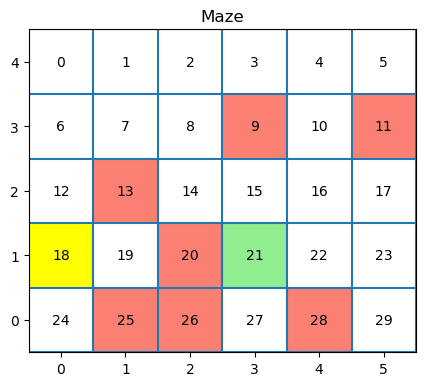

In [105]:
agent = Agent(
    nrow_maze=5,
    ncol_maze=6,
    seed=6,
    rewards={'step': 0, 'wall':-1, 'goal': 10}
)

# Initiating the maze
agent.init_maze(maze_density=7)

# Ploting the maze
plot_matrix(agent.S, goal_coords=agent.goal_coords, hole_coords=agent.wall_coords, start_coords=agent.start_coords, title="Maze")

Display the initial Q table

In [107]:
agent.train_episodes(num_episodes=100)

Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 0
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1
Episode 1


In [110]:

# Creating the policy dictionary 
agent.create_policy()

# Creating the optimal policy path
agent.create_optimal_policy_path()

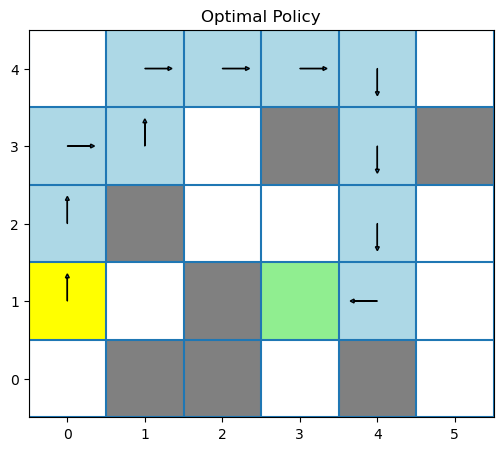

In [112]:
plot_policy(
    S=agent.S, 
    policy=agent.policy, 
    optimal_policy_path=agent.optimal_policy_path_coords,
    goal_coords=agent.goal_coords, 
    wall_coords=agent.wall_coords, 
    start_coords=agent.start_coords, 
    title="Optimal Policy"
    )

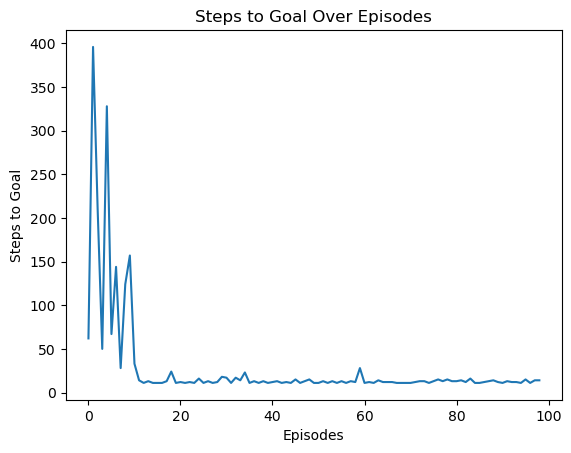

In [114]:
agent.plot_steps_to_goal()

In [ ]:
#Following cells shows the construction of the animation 

In [116]:
# Creating a directory for GIFs
path_to_gifs = "V-learning-animation"
os.makedirs(path_to_gifs, exist_ok=True)

def create_animation(image_dir: str, output_filename: str, duration: int = 300):
    images = []
    image_files = os.listdir(image_dir)
    image_files.sort(key=lambda x: int(x.split("_")[1].split(".")[0]))
    for file in image_files:
        images.append(Image.open(os.path.join(image_dir, file)))
    images[0].save(
        output_filename,
        save_all=True,
        append_images=images[1:],
        duration=duration,
        loop=0
    )

In [120]:
#Constructing the animation for both Q-value and V-value table updates.
create_animation(agent.path_to_images_Q,f"{path_to_gifs}/Q_episode.gif")
create_animation(agent.path_to_images_V,f"{path_to_gifs}/V_episode.gif")

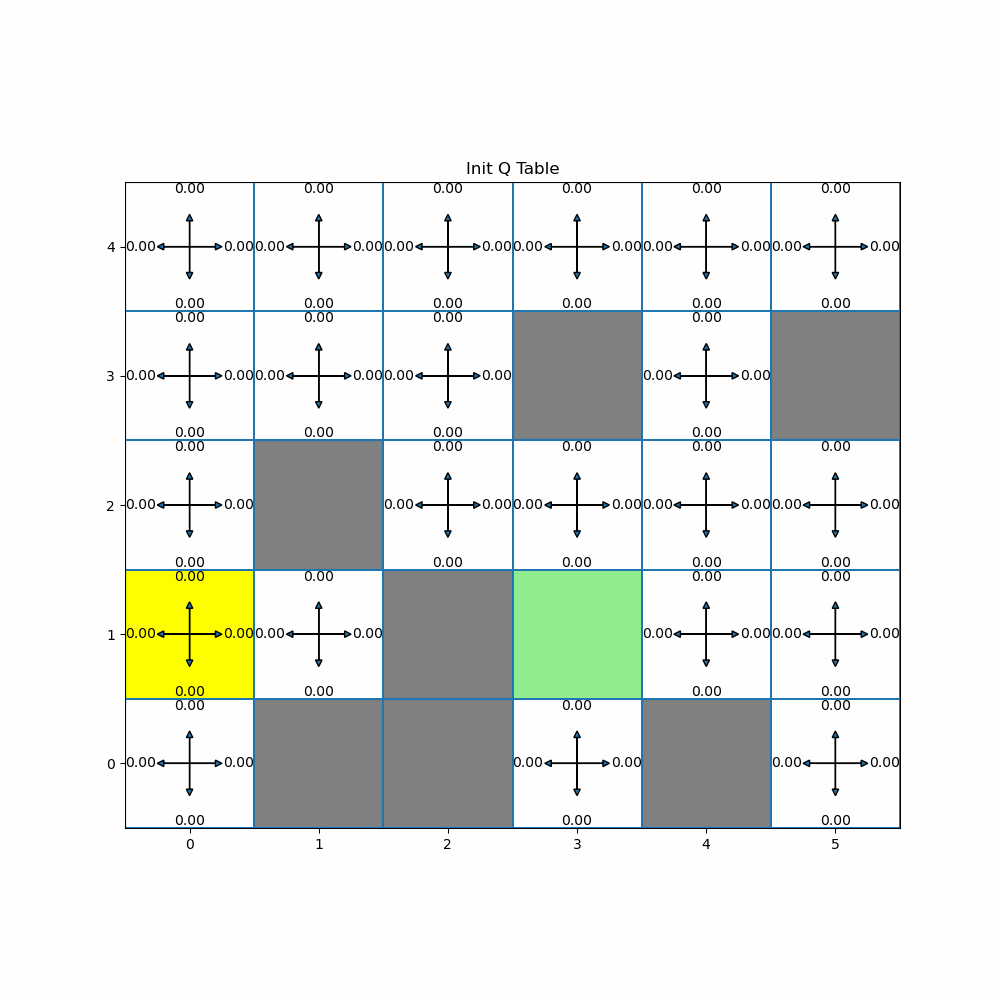

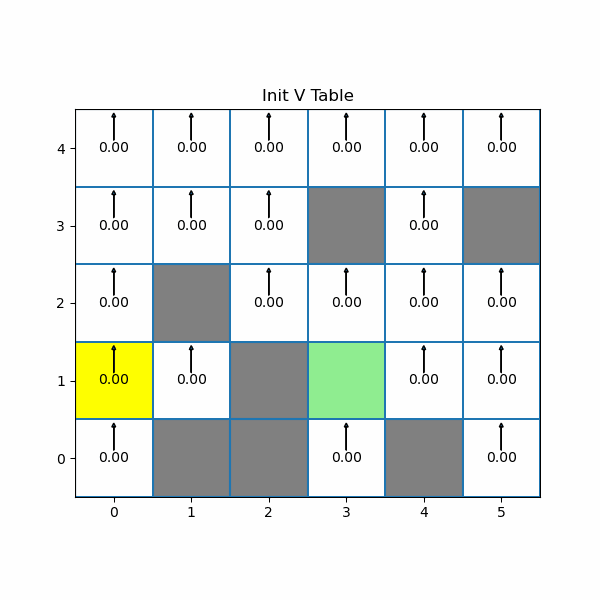

In [124]:
from IPython.display import display, Image

gif_path = f"{path_to_gifs}/Q_episode.gif"
display(Image(filename=gif_path))

gif_path2 = f"{path_to_gifs}/V_episode.gif"
display(Image(filename=gif_path2))


In this work, I designed a 5×6 maze as required. Initially, I attempted to create a more complex maze to make the task more challenging. However, the training process took significantly longer, so I decided to proceed with a smaller maze size.

For the reward system, I introduced a negative reward whenever the agent collided with a wall and assigned a reward of 10 for reaching the goal. Additionally, I penalized every step the agent took to encourage it to find the most optimized path. However, this approach increased the training time.

Looking at the graph of steps per episode, we can observe that in the early episodes, the number of steps required to reach the goal fluctuates significantly, with some episodes requiring over 300 steps. This suggests that the agent was still exploring and learning an efficient policy. Around episode 15, the steps drastically decrease, indicating that the agent has successfully learned to navigate the maze more efficiently. Beyond this point, the number of steps remains relatively low with only minor fluctuations, showing that the agent has converged to an optimal or near-optimal policy.
                                                                                                                              

# References

1.   https://github.com/Eligijus112/rl-snake-game
2.   Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction. MIT press, 2018.




